# 학습 데이터 분석
## Simplified Data 분석하기

* 학습 데이터 중 simplified data가 어떻게 구성되어 있는지 확인한다.

In [1]:
import os

dir_path = 'C:\Devel\git\PJ_Quick_draws\Preprocessing\seonjae\data'
# 데이터셋 경로에 있는 csv파일 개수(클래스 종류) 확인
class_file = os.listdir(dir_path)
len(class_file)

340

학습 데이터셋의 클래스는 총 340종류이다.

In [2]:
import pandas as pd

df_data = []

# 리스트의 각 요소에 클래스별 데이터 대입
for i in class_file:
    df_data.append(pd.read_csv(dir_path+'\\'+i))
    
# 첫 번째 데이터셋의 상위 5개의 행 확인
df_data[0].head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...",5152802093400064,True,2017-03-08 21:12:07.266040,airplane
1,CA,"[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4...",6622904974311424,False,2017-03-06 21:39:04.690130,airplane
2,US,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...",6577010312740864,True,2017-03-23 02:08:35.229980,airplane
3,US,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...",5643224746033152,True,2017-03-10 00:35:17.531970,airplane
4,IL,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...",6670046841536512,True,2017-01-23 18:11:11.658170,airplane


데이터셋의 컬럼으로는 'countrycode', 'drawing', 'key_id', 'recognized', 'timestamp', 'word'가 있다.

In [3]:
# 각 클래스 별 데이터 개수 확인
for i, value in enumerate(df_data):
    print(f'Size of {class_file[i]}: {len(value)}')

Size of airplane.csv: 151623
Size of alarm clock.csv: 123399
Size of ambulance.csv: 148004
Size of angel.csv: 149736
Size of animal migration.csv: 137847
Size of ant.csv: 124612
Size of anvil.csv: 126231
Size of apple.csv: 144722
Size of arm.csv: 120951
Size of asparagus.csv: 168102
Size of axe.csv: 124122
Size of backpack.csv: 125801
Size of banana.csv: 307936
Size of bandage.csv: 147614
Size of barn.csv: 151139
Size of baseball bat.csv: 123809
Size of baseball.csv: 135375
Size of basket.csv: 118458
Size of basketball.csv: 133793
Size of bat.csv: 118114
Size of bathtub.csv: 174336
Size of beach.csv: 124938
Size of bear.csv: 134762
Size of beard.csv: 165202
Size of bed.csv: 113862
Size of bee.csv: 120890
Size of belt.csv: 191119
Size of bench.csv: 128695
Size of bicycle.csv: 126527
Size of binoculars.csv: 124190
Size of bird.csv: 133572
Size of birthday cake.csv: 144982
Size of blackberry.csv: 128153
Size of blueberry.csv: 127878
Size of book.csv: 119364
Size of boomerang.csv: 142682
S

In [4]:
min_size = 1000000
min_idx = 0
max_size = 0
max_idx = 0

# 모든 클래스 중 데이터 개수 최댓값과 최솟값 확인
for i, value in enumerate(df_data):
    if len(value) < min_size:
        min_size = len(value)
        min_idx = i
    
    if len(value) > max_size:
        max_size = len(value)
        max_idx = i
        
print(f'Max Size of class is {class_file[max_idx]}: {max_size}')
print(f'Min Size of class is {class_file[min_idx]}: {min_size}')

Max Size of class is snowman.csv: 340029
Min Size of class is panda.csv: 113613


각각의 클래스에 들어있는 데이터의 개수를 확인하고, 데이터가 가장 많은 클래스와 가장 적은 클래스를 확인한다.  
* 가장 많은 데이터를 가진 클래스는 눈사람 클래스로, 총 340,029개의 데이터를 가지고 있다.
* 가장 적은 데이터를 가진 클래스는 판다 클래스로, 총 113,613개의 데이터를 가지고 있다.

In [5]:
total_data = 0

# 총 데이터 개수 확인
for i in df_data:
    total_data += len(i)
    
print(f'Total size of simplified data is {total_data}')

Total size of simplified data is 49707579


우리가 학습시킬 데이터의 클래스 종류는 340개이며, 크기는 49,707,579개임을 확인할 수 있다.

In [6]:
# 모든 클래스에 대한 데이터를 하나의 데이터프레임으로 병합
merged_dataframe = pd.concat(df_data, ignore_index=True)

# 두 개의 컬럼만 추출
df_train = merged_dataframe[['drawing', 'word']]

# 결과 확인
print(len(df_train))

49707579


In [7]:
print(df_train.head())
print(df_train.tail())

                                             drawing      word
0  [[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...  airplane
1  [[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4...  airplane
2  [[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...  airplane
3  [[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...  airplane
4  [[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...  airplane
                                                    drawing    word
49707574  [[[42, 0, 44, 90, 23, 35, 108, 208, 255, 172, ...  zigzag
49707575  [[[59, 63, 80, 94, 97, 56, 50, 52, 120, 172, 2...  zigzag
49707576  [[[64, 178, 94, 35, 111, 182, 0, 39, 123, 222]...  zigzag
49707577  [[[0, 4, 35, 50, 61, 69, 74, 95, 105, 109, 112...  zigzag
49707578  [[[0, 33, 132, 164, 165, 155, 85, 37, 23, 28, ...  zigzag


데이터프레임이 병합되고, 분석에 필요한 두 컬럼만 잘 추출된 것을 확인할 수 있다.

In [8]:
df_train.iloc[1][0]

'[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 46, 53, 67, 83, 84, 72, 69], [62, 102, 118, 118, 104, 93, 82, 74]], [[15, 25, 26, 17], [54, 51, 54, 54]], [[48, 55, 61, 49], [53, 50, 52, 52]], [[75, 87, 87, 69], [53, 54, 56, 55]], [[122, 140, 138, 102, 111, 155, 162, 167, 162, 145, 124, 75], [48, 42, 34, 23, 20, 27, 30, 44, 65, 78, 87, 89]], [[46, 67, 74, 80, 84, 86, 75], [36, 13, 8, 9, 13, 29, 46]], [[0, 7, 50], [56, 61, 69]], [[201, 235], [14, 0]], [[221, 251, 255], [50, 59, 64]], [[232, 249], [94, 102]]]'

C:\Users\tjswo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjswo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjswo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


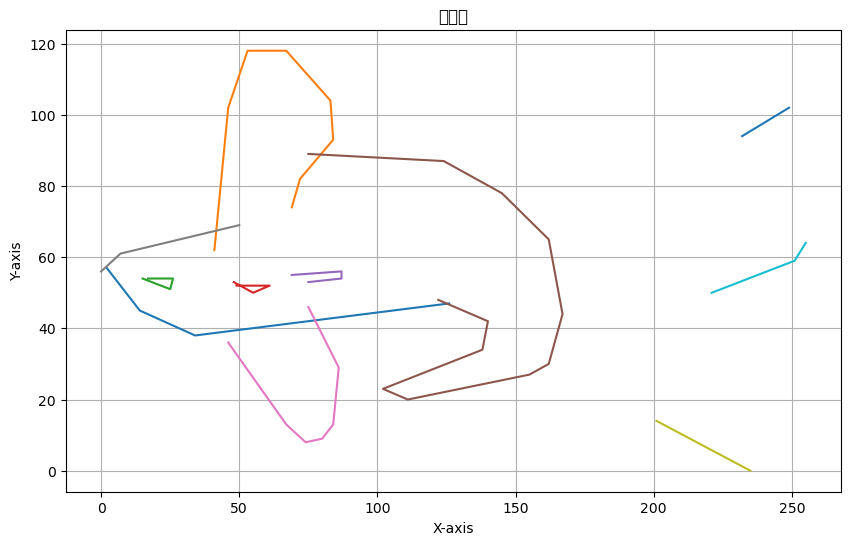

In [15]:
import matplotlib.pyplot as plt
import json

# 컬럼에 들어있는 데이터를 리스트로 변환
data_list = json.loads(df_train.iloc[1][0])

plt.figure(figsize=(10, 6))
# 데이터 시각화
for segment in data_list:
    plt.plot(segment[0], segment[1])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('그래프')
plt.grid(True)
plt.show()